linear increasing time - 

In [41]:
import pandas as pd
from sklearn import preprocessing

## Change data source accordingly

In [42]:
df = pd.read_csv("Cleaned-Tornadoes_v2.csv")
df

,EVENT_ID,BEGIN_DAY,BEGIN_TIME,YEAR,DAMAGE_PROPERTY,TOR_LENGTH,TOR_WIDTH,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,Median Household Income,Pop_Density,Housing_Units_Density,CASUALTIES,sin_time,cos_time,AVG_RANGE
0,199172,29,1757,2009,7.500000e+04,3.32,75.0,2.0,2.0,33.4744,-94.4295,33.4776,-94.4245,45455.000000,104.600000,43.500000,0,-0.993670,-0.112336,2.0
1,203900,6,2130,2009,3.500000e+04,0.09,80.0,2.0,2.0,45.0100,-124.0100,45.0100,-124.0100,41791.000000,47.000000,31.200000,0,-0.649448,0.760406,2.0
2,203474,9,1520,2009,0.000000e+00,0.25,20.0,0.0,0.0,37.6263,-83.9644,37.6263,-83.9644,33839.000000,58.000000,27.100000,0,-0.743145,-0.669131,0.0
3,203005,24,421,2009,0.000000e+00,2.67,75.0,2.0,4.0,31.5842,-93.4995,31.6228,-93.4970,49574.816003,173.203999,74.618833,0,0.892192,0.451656,3.0
4,202997,24,820,2009,1.000000e+05,5.96,150.0,2.0,5.0,32.7700,-92.5400,32.8400,-92.4800,49574.816003,173.203999,74.618833,0,0.838671,-0.544639,3.5
5,167751,20,1845,2009,5.000000e+03,7.86,100.0,1.0,1.0,36.9500,-76.7800,36.9853,-76.6446,70982.000000,111.800000,46.400000,0,-0.993068,0.117537,1.0
6,146677,18,1949,2009,0.000000e+00,3.18,220.0,9.0,7.0,33.6420,-82.5840,33.6380,-82.5290,39642.000000,85.000000,36.200000,0,-0.924878,0.380263,8.0
7,200666,24,536,2009,0.000000e+00,2.76,50.0,4.0,1.0,32.0301,-93.2340,32.0636,-93.2084,49574.816003,173.203999,74.618833,0,0.985996,0.166769,2.5
8,147391,10,1705,2009,2.500000e+06,1.60,200.0,0.0,1.0,31.2690,-88.0320,31.2751,-88.0055,37575.000000,16.300000,7.800000,0,-0.969231,-0.246153,0.5
9,159422,9,1920,2009,1.000000e+05,1.64,150.0,1.0,2.0,37.0578,-93.3205,37.0749,-93.2998,54273.000000,137.600000,56.100000,0,-0.951057,0.309017,1.5


In [187]:
X = preprocessing.scale(df.drop(['CASUALTIES','CASUALTIES_BIN', 'TOR_LENGTH', 'TOR_WIDTH'], axis=1))

In [171]:
df['CASUALTIES_BIN'] = [1 if df['CASUALTIES'][i] > 0 else 0 for i in range(len(df))]

In [188]:
Y = df['CASUALTIES_BIN']

In [189]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [226]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

In [227]:
len(y_train[y_train == 1])

473

In [228]:
len(y_train[y_train == 0])

5828

### Data Balancing 1: SMOTE Data Balancing (only works on binary variables, so only applicable to Logistic Regression)

In [229]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

In [230]:
len(y_train_res)

11656

In [231]:
len(y_train_res[y_train_res == 1])

5828

In [232]:
len(y_train_res[y_train_res == 0])

5828

### Logisitic Regression

In [233]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train_res, y_train_res, )
y_pred = clf.predict(x_test)

In [234]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [235]:
accuracy_score(y_test,y_pred)

0.6874008251348778

In [236]:
f1_score(y_test,y_pred)

0.2364341085271318

In [237]:
confusion_matrix(y_test, y_pred)

array([[4027, 1807],
       [ 163,  305]])

In [238]:
roc_auc_score(y_test, y_pred)

0.6709866857707104

In [ ]:
# give a bigger sample weight to minority class in the fit function

### Linear Regression Testing

In [245]:
df = df.sort_values(['CASUALTIES'])

### Data Balancing 2: Equal number of casualities = 0 and casualties > 0 in both training and test sets
#### By selecting alternate rows

In [247]:
df_train = df.iloc[::2, :]

In [248]:
df_test = df.iloc[1::2, :]

In [253]:
df_xtrain = preprocessing.scale(df_train.drop(['CASUALTIES','CASUALTIES_BIN', 'TOR_LENGTH', 'TOR_WIDTH'], axis=1))

In [254]:
df_ytrain = df_train['CASUALTIES']

In [256]:
df_xtest = preprocessing.scale(df_test.drop(['CASUALTIES','CASUALTIES_BIN', 'TOR_LENGTH', 'TOR_WIDTH'], axis=1))

In [257]:
df_ytest = df_test['CASUALTIES']

In [272]:
df_xtrain

array([[-1.3644963 ,  1.31844242,  0.44555668, ..., -0.82299698,
         0.05060143, -0.36094223],
       [ 0.7730057 , -0.05539002,  0.01032936, ..., -0.42537917,
        -0.81297387, -0.36094223],
       [ 0.73628588,  0.86049827,  0.24931579, ..., -0.71166154,
        -0.36529833,  1.46012891],
       ...,
       [-0.00951316,  0.28806809, -0.24031495, ...,  0.02147277,
        -1.16627077,  0.47955214],
       [-0.74449488,  1.08947035,  0.20851323, ..., -0.67396532,
        -0.44746612, -0.36094223],
       [-0.84137296,  0.51704016,  0.21822813, ..., -0.68337884,
        -0.42807974, -0.36094223]])

In [262]:
#11662
len(df_ytrain[df_ytrain == 0])

5831

In [263]:
len(df_ytrain[df_ytrain > 0])

471

In [264]:
len(df_ytest[df_ytest == 0])

5831

In [265]:
len(df_ytest[df_ytest > 0])

470

In [267]:
reg = LinearRegression().fit(df_xtrain, df_ytrain)

In [269]:
y_pred = reg.predict(df_xtest)

In [270]:
mean_absolute_error(df_ytest, y_pred)

1.9223738756888618

In [271]:
reg.score(df_xtest,df_ytest)

0.3081492862274505

In [13]:
reg.coef_

array([ 3.97706262e-01,  2.94978061e-02, -8.75983599e-02, -5.58864079e-01,
        1.43007549e+01,  4.46776784e-02,  7.41372666e-01, -5.32285772e-02,
        5.48181246e-02, -4.41872124e+01, -1.42718826e+02,  4.40192878e+01,
        1.42901689e+02,  3.69630037e-02,  1.08442470e-02,  1.10975797e-01,
       -2.51990306e-01, -1.87599635e-01,  8.20254391e-04])

In [29]:
LinearRegression().fit(x_train[:,0].reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Data Balancing 3: Using Sample Weights (in progress)

In [273]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

In [275]:
# add sample_weight in fit function
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train, y_train, sample_weight = 0.9)
y_pred = clf.predict(x_test)

TypeError: Singleton array array(0.9) cannot be considered a valid collection.

### Run other models - Lasso, Ridge, etc

In [ ]:
# Lasso
# non-regualized
# sk learn.linear model. ridge

### Working with $R^2$

In [31]:
R2_score = []
for i in range(18):
    reg = LinearRegression().fit(x_train[:,i].reshape(-1, 1), y_train)
    y_pred = reg.predict(x_test[:,i].reshape(-1, 1))
    mean_absolute_error(y_test, y_pred)
    R2_score.append(reg.score(x_test[:,i].reshape(-1, 1),y_test))

In [36]:
R2_score

[6.521506312084924e-06,
 0.00014788853513036937,
 -0.0003394126291706989,
 -1.741345647765513e-05,
 0.5045435015239492,
 0.018257897703034653,
 0.02762689871587365,
 -0.00031399637482465437,
 -0.0003111999299219015,
 7.009483006192863e-05,
 -0.0003652106335760852,
 3.3402596765208514e-05,
 -0.00034960996394484134,
 -0.0004028370150361838,
 -0.000215115144574618,
 -0.00021965784381472453,
 -0.00022891009853553965,
 -0.000308650413891165]

In [23]:
# 18
len(x_test[:,18])

6302

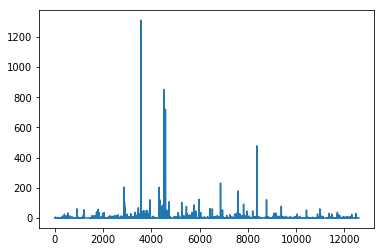

In [39]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['CASUALTIES'])

(array([1.2599e+04, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   0. ,  262.2,  524.4,  786.6, 1048.8, 1311. ]),
 <a list of 5 Patch objects>)

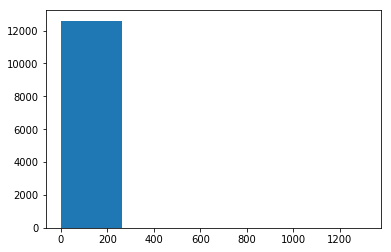

In [40]:
plt.hist(df['CASUALTIES'], bins = 5)